# Israel Crime Analysis, Clustering and Prediction

### Import libraries

In [288]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn import preprocessing ,metrics
import itertools
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import re
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from scipy.spatial.distance import cdist
pd.options.mode.chained_assignment=None
from itertools import islice
from mpl_toolkits.mplot3d import Axes3D
import operator
from IPython.display import HTML
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import plot_confusion_matrix

RSEED=50

##  1. Download the data

### cities data set

In [289]:
import os
print(os.getcwd())
read_file=pd.read_excel("cities.xlsx")
# Write the dataframe object
# into csv file
read_file.to_csv ("cities.csv", 
                  index = None,
                  header=True)
cities = pd.DataFrame(pd.read_csv("cities.csv"))
  
cities.head()

C:\Users\brsha


,שם יישוב,סמל יישוב,תעתיק,מחוז,נפה,אזור טבעי,מעמד מונציפאלי,שיוך מטרופוליני,דת יישוב,סך הכל אוכלוסייה 2018,...,שנת ייסוד,צורת יישוב שוטפת,השתייכות ארגונית,קואורדינטות,גובה,ועדת תכנון,מרחב משטרה,שנה,שם יישוב באנגלית,אשכול רשויות מקומיות
0,אבו ג'ווייעד (שבט),967,ABU JUWEI'ID,6,62,623.0,NaN,NaN,3.0,NaN,...,NaN,460,NaN,2.040057e+09,NaN,699.0,15003711.0,2018,Abu Juway'ad,NaN
1,אבו גוש,472,ABU GHOSH,1,11,111.0,99.0,444.0,2.0,7543.0,...,NaN,280,NaN,2.105263e+09,598.0,152.0,10002475.0,2018,Abu Ghosh,NaN
2,אבו סנאן,473,ABU SINAN,2,24,245.0,99.0,NaN,2.0,13915.0,...,NaN,270,NaN,2.160776e+09,19.0,252.0,10004315.0,2018,Abu Sinan,NaN
3,אבו סריחאן (שבט),935,ABU SUREIHAN,6,62,623.0,NaN,NaN,3.0,NaN,...,NaN,460,NaN,1.865057e+09,NaN,699.0,10001937.0,2018,Abu Surayhan,NaN
4,אבו עבדון (שבט),958,ABU ABDUN,6,62,623.0,NaN,NaN,3.0,NaN,...,NaN,460,NaN,1.850058e+09,NaN,699.0,10001937.0,2018,Abu 'Abdun,NaN


In [290]:
cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482 entries, 0 to 1481
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   שם יישוב               1482 non-null   object 
 1   סמל יישוב              1482 non-null   int64  
 2   תעתיק                  1261 non-null   object 
 3   מחוז                   1482 non-null   int64  
 4   נפה                    1482 non-null   int64  
 5   אזור טבעי              1334 non-null   float64
 6   מעמד מונציפאלי         1405 non-null   float64
 7   שיוך מטרופוליני        553 non-null    float64
 8   דת יישוב               1246 non-null   float64
 9   סך הכל אוכלוסייה 2018  1218 non-null   float64
 10  יהודים ואחרים          1187 non-null   float64
 11  מזה: יהודים            1161 non-null   float64
 12  ערבים                  544 non-null    float64
 13  שנת ייסוד              1089 non-null   object 
 14  צורת יישוב שוטפת       1482 non-null   int64  
 15  השתי

### crimes data set

In [291]:
read_file = pd.read_excel ("crimes.xlsx")
  
# Write the dataframe object
# into csv file
read_file.to_csv ("crimes.csv", 
                  index = None,
                  header=True)
crimes = pd.DataFrame(pd.read_csv("crimes.csv"))
  
crimes.head()

,סמל יישוב,יישוב מחושב,תאור קבוצה סטטיסטית,שנת הודעה,Total,2019,2018,2017,2016,2015,2014
0,NaN,Total,NaN,NaN,1973220,301142,320713,329265,328681,339804,353615
1,472.0,אבו גוש,Total,NaN,1997,338,284,310,340,323,402
2,472.0,אבו גוש,-,NaN,4,2,2,-,-,-,-
3,472.0,אבו גוש,עבירות בטחון,NaN,55,7,9,8,6,15,10
4,472.0,אבו גוש,עבירות כלכליות,NaN,3,1,-,-,-,2,-


In [292]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   סמל יישוב            3682 non-null   float64
 1   יישוב מחושב          3683 non-null   object 
 2   תאור קבוצה סטטיסטית  3682 non-null   object 
 3   שנת הודעה            0 non-null      float64
 4   Total                3683 non-null   int64  
 5   2019                 3683 non-null   object 
 6   2018                 3683 non-null   object 
 7   2017                 3683 non-null   object 
 8   2016                 3683 non-null   object 
 9   2015                 3683 non-null   object 
 10  2014                 3683 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 316.6+ KB


### mapping data set

In [293]:
read_file = pd.read_excel ("mapping.xlsx")
  
# Write the dataframe object
# into csv file
read_file.to_csv ("mapping.csv", 
                  index = None,
                  header=True)
df_mapping = pd.DataFrame(pd.read_csv("mapping.csv"))
  
df_mapping.head()

,רשימת הסמלים לביאור 2018,Unnamed: 1
0,NaN,NaN
1,שם הגליון,מס'
2,מחוז ונפה,1
3,מעמד מוניציפלי,2
4,איזור טבעי,3


## 2. Pre Proccessing and EDA

#### crimes data set

In [294]:
#drop coulmn
df_crimes = crimes.drop(['שנת הודעה'],axis=1)

In [295]:
#looking for missing values
df_crimes[df_crimes['סמל יישוב'].isna()]

#drop the first row
df_crimes = df_crimes.dropna()
df_crimes.reset_index(drop=True)

,סמל יישוב,יישוב מחושב,תאור קבוצה סטטיסטית,Total,2019,2018,2017,2016,2015,2014
0,472.0,אבו גוש,Total,1997,338,284,310,340,323,402
1,472.0,אבו גוש,-,4,2,2,-,-,-,-
2,472.0,אבו גוש,עבירות בטחון,55,7,9,8,6,15,10
3,472.0,אבו גוש,עבירות כלכליות,3,1,-,-,-,2,-
4,472.0,אבו גוש,עבירות כלפי המוסר,60,14,5,11,6,8,16
...,...,...,...,...,...,...,...,...,...,...
3677,1054.0,תל שבע,עבירות נגד גוף,1107,179,188,202,189,171,178
3678,1054.0,תל שבע,עבירות סדר ציבורי,2112,427,444,344,316,262,319
3679,1054.0,תל שבע,עבירות רשוי,41,6,10,9,8,1,7
3680,1054.0,תל שבע,עבירות תנועה,67,7,13,16,12,9,10


In [296]:
#chaging data typs
df_crimes['סמל יישוב'] = df_crimes['סמל יישוב'].astype(int)
#rename columns
df_crimes.columns = ['cityCode', 'cityName', 'type', 'total' ,'2019', '2018', '2017', '2016', '2015', '2014']

In [297]:
#dealing with missing values
df_crimes['2019'] = df_crimes['2019'].replace('-', np.nan)
df_crimes['2018'] = df_crimes['2018'].replace('-', np.nan)
df_crimes['2017'] = df_crimes['2017'].replace('-', np.nan)
df_crimes['2016'] = df_crimes['2016'].replace('-', np.nan)
df_crimes['2015'] = df_crimes['2015'].replace('-', np.nan)
df_crimes['2014'] = df_crimes['2014'].replace('-', np.nan)

df_crimes['2019'] = df_crimes['2019'].fillna(0)
df_crimes['2018'] = df_crimes['2018'].fillna(0)
df_crimes['2017'] = df_crimes['2017'].fillna(0)
df_crimes['2016'] = df_crimes['2016'].fillna(0)
df_crimes['2015'] = df_crimes['2015'].fillna(0)
df_crimes['2014'] = df_crimes['2014'].fillna(0)

#change data type of columns '2019', '2018', '2017', '2016', '2015', '2014'
df_crimes['2019']= df_crimes['2019'].astype(int)
df_crimes['2018']= df_crimes['2018'].astype(int)
df_crimes['2017']= df_crimes['2017'].astype(int)
df_crimes['2016']= df_crimes['2016'].astype(int)
df_crimes['2015']= df_crimes['2015'].astype(int)
df_crimes['2014']= df_crimes['2014'].astype(int)

In [298]:
df_crimes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3682 entries, 1 to 3682
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   cityCode  3682 non-null   int32 
 1   cityName  3682 non-null   object
 2   type      3682 non-null   object
 3   total     3682 non-null   int64 
 4   2019      3682 non-null   int32 
 5   2018      3682 non-null   int32 
 6   2017      3682 non-null   int32 
 7   2016      3682 non-null   int32 
 8   2015      3682 non-null   int32 
 9   2014      3682 non-null   int32 
dtypes: int32(7), int64(1), object(2)
memory usage: 215.7+ KB


In [299]:
#unique values in types of crimes 
df_crimes['type'].unique() 

array(['Total', '-', 'עבירות בטחון', 'עבירות כלכליות',
       'עבירות כלפי המוסר', 'עבירות כלפי הרכוש', 'עבירות מין',
       'עבירות מרמה', 'עבירות נגד אדם', 'עבירות נגד גוף',
       'עבירות סדר ציבורי', 'עבירות רשוי', 'עבירות תנועה', 'שאר עבירות',
       'סעיפי הגדרה', 'עבירות מנהליות', 'לא ידוע'], dtype=object)

In [300]:
#translating crime type to english
df_crimes.loc[df_crimes['type'] == 'עבירות בטחון', ['type']] = 'securety crimes'
df_crimes.loc[df_crimes['type'] == 'עבירות כלכליות', ['type']] = 'economic crimes'
df_crimes.loc[df_crimes['type'] == 'עבירות כלפי המוסר', ['type']] = 'morality crimes'
df_crimes.loc[df_crimes['type'] == 'עבירות כלפי הרכוש', ['type']] = 'property crimes'
df_crimes.loc[df_crimes['type'] == 'עבירות מין', ['type']] = 'sexual crimes'
df_crimes.loc[df_crimes['type'] == 'עבירות מרמה', ['type']] = 'fraud crimes'
df_crimes.loc[df_crimes['type'] == 'עבירות נגד אדם', ['type']] = 'person crimes'
df_crimes.loc[df_crimes['type'] == 'עבירות נגד גוף', ['type']] = 'body crimes'
df_crimes.loc[df_crimes['type'] == 'עבירות סדר ציבורי', ['type']] = 'public order crimes'
df_crimes.loc[df_crimes['type'] == 'עבירות רשוי', ['type']] = 'licensed crimes'
df_crimes.loc[df_crimes['type'] == 'עבירות תנועה', ['type']] = 'traffic crimes'
df_crimes.loc[df_crimes['type'] == 'שאר עבירות', ['type']] = 'other'
df_crimes.loc[df_crimes['type'] == 'עבירות מנהליות', ['type']] = 'administrative crimes'
df_crimes.loc[df_crimes['type'] == 'לא ידוע', ['type']] = 'unknown'
df_crimes.loc[df_crimes['type'] == '-', ['type']] = 'unknown'
df_crimes.loc[df_crimes['type'] == 'סעיפי הגדרה', ['type']] = 'other'

df_crimes

,cityCode,cityName,type,total,2019,2018,2017,2016,2015,2014
1,472,אבו גוש,Total,1997,338,284,310,340,323,402
2,472,אבו גוש,unknown,4,2,2,0,0,0,0
3,472,אבו גוש,securety crimes,55,7,9,8,6,15,10
4,472,אבו גוש,economic crimes,3,1,0,0,0,2,0
5,472,אבו גוש,morality crimes,60,14,5,11,6,8,16
...,...,...,...,...,...,...,...,...,...,...
3678,1054,תל שבע,body crimes,1107,179,188,202,189,171,178
3679,1054,תל שבע,public order crimes,2112,427,444,344,316,262,319
3680,1054,תל שבע,licensed crimes,41,6,10,9,8,1,7
3681,1054,תל שבע,traffic crimes,67,7,13,16,12,9,10


#### cities data set

In [301]:
#drop unrelevant columns
df_cities = cities.drop(cities.iloc[:, 5:6], axis = 1)
#df_cities = df_cities.drop(cities.iloc[:, 7:9], axis = 1)
df_cities = df_cities.drop(cities.columns[[7]], axis = 1)
#df_cities = df_cities.drop(cities.columns[[9]], axis = 1)
#df_cities = df_cities.drop(cities.iloc[:, 10:21], axis = 1)
df_cities = df_cities.drop(cities.iloc[:, 10:11], axis = 1)
df_cities = df_cities.drop(cities.iloc[:, 12:14], axis = 1)
df_cities = df_cities.drop(cities.iloc[:, 15:16], axis = 1)
df_cities = df_cities.drop(cities.iloc[:, 18:21], axis = 1)
df_cities = df_cities.drop(cities.columns[[22]], axis = 1)
df_cities = df_cities.drop(cities.columns[[2]], axis = 1)
df_cities.head()

,שם יישוב,סמל יישוב,מחוז,נפה,מעמד מונציפאלי,דת יישוב,סך הכל אוכלוסייה 2018,מזה: יהודים,צורת יישוב שוטפת,קואורדינטות,גובה,שם יישוב באנגלית
0,אבו ג'ווייעד (שבט),967,6,62,NaN,3.0,NaN,NaN,460,2.040057e+09,NaN,Abu Juway'ad
1,אבו גוש,472,1,11,99.0,2.0,7543.0,79.0,280,2.105263e+09,598.0,Abu Ghosh
2,אבו סנאן,473,2,24,99.0,2.0,13915.0,11.0,270,2.160776e+09,19.0,Abu Sinan
3,אבו סריחאן (שבט),935,6,62,NaN,3.0,NaN,NaN,460,1.865057e+09,NaN,Abu Surayhan
4,אבו עבדון (שבט),958,6,62,NaN,3.0,NaN,NaN,460,1.850058e+09,NaN,Abu 'Abdun


In [302]:
#rename column
df_cities.columns = ['cityName_heb', 'cityCode', 'district', 'subdistrict','municipal status','religion' ,'size', 'jewish', 'type of locality', 'cordi', 'highet','cityName']
df_cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482 entries, 0 to 1481
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cityName_heb      1482 non-null   object 
 1   cityCode          1482 non-null   int64  
 2   district          1482 non-null   int64  
 3   subdistrict       1482 non-null   int64  
 4   municipal status  1405 non-null   float64
 5   religion          1246 non-null   float64
 6   size              1218 non-null   float64
 7   jewish            1161 non-null   float64
 8   type of locality  1482 non-null   int64  
 9   cordi             1450 non-null   float64
 10  highet            1286 non-null   float64
 11  cityName          1261 non-null   object 
dtypes: float64(6), int64(4), object(2)
memory usage: 139.1+ KB


In [303]:
#checking missing values in municipal status column
df_cities['municipal status'].isnull().sum()
df_cities['municipal status'].unique()
df_cities[df_cities['municipal status'].isnull()]
#all missing values in municipal status column are not defined, we will replace the code with -2
df_cities['municipal status']= df_cities['municipal status'].fillna(-2)
df_cities['municipal status']= df_cities['municipal status'].astype(int)
df_cities

,cityName_heb,cityCode,district,subdistrict,municipal status,religion,size,jewish,type of locality,cordi,highet,cityName
0,אבו ג'ווייעד (שבט),967,6,62,-2,3.0,NaN,NaN,460,2.040057e+09,NaN,Abu Juway'ad
1,אבו גוש,472,1,11,99,2.0,7543.0,79.0,280,2.105263e+09,598.0,Abu Ghosh
2,אבו סנאן,473,2,24,99,2.0,13915.0,11.0,270,2.160776e+09,19.0,Abu Sinan
3,אבו סריחאן (שבט),935,6,62,-2,3.0,NaN,NaN,460,1.865057e+09,NaN,Abu Surayhan
4,אבו עבדון (שבט),958,6,62,-2,3.0,NaN,NaN,460,1.850058e+09,NaN,Abu 'Abdun
...,...,...,...,...,...,...,...,...,...,...,...,...
1477,תקומה,665,6,62,39,1.0,699.0,699.0,310,1.600360e+09,109.0,Tequma
1478,תקוע,3563,7,76,76,1.0,3882.0,3840.0,190,2.218962e+09,566.0,Teqoa
1479,תראבין א-צאנע (שבט),970,6,62,-2,3.0,NaN,NaN,460,1.830056e+09,NaN,Tarabin as-Sani'
1480,תרבין א-צאנע (יישוב)*,1346,6,62,69,2.0,1089.0,6.0,450,1.752658e+09,210.0,Tarabin As-Sani


In [304]:
#checking missing values in municipal status column
df_cities['cityName'].isnull().sum() / len(df_cities) # 0.149
#drop rows with NaN in the cityName column
df_cities.dropna(subset = ['cityName'], inplace = True)
df_cities['size'].isnull().sum()

43

In [305]:
#fill missing valus in size column with 0
df_cities['size'] = df_cities['size'].fillna(0)
df_cities['size'] = df_cities['size'].astype(int)
df_cities['religion'] = df_cities['religion'].fillna(0)
df_cities['religion'] = df_cities['religion'].astype(int)
df_cities['jewish'] = df_cities['jewish'].fillna(0)
df_cities['jewish'] = df_cities['jewish'].astype(int)
df_cities['cordi'] = df_cities['cordi'].fillna(0)
df_cities['cordi'] = df_cities['cordi'].astype(int)
df_cities['highet'] = df_cities['highet'].fillna(0)
df_cities['highet'] = df_cities['highet'].astype(int)

#### Merge crimes and cities  into one data set

In [306]:
#merge crimes and cities tables by city code
df_merge = df_crimes.merge(df_cities, on = ['cityCode'] , how='inner').reset_index()
df_merge = df_merge.drop(['cityName_x', 'cityName_heb'],axis=1)
df_merge.rename(columns = {'cityName_y':'cityName'}, inplace = True) 
df_merge = df_merge[['cityName', 'cityCode', 'district', 'subdistrict', 'municipal status','religion', 'size', 'jewish', 'type of locality','cordi', 'highet', 'type', 'total', '2019', '2018', '2017', '2016', '2015', '2014']]
df_merge

,cityName,cityCode,district,subdistrict,municipal status,religion,size,jewish,type of locality,cordi,highet,type,total,2019,2018,2017,2016,2015,2014
0,Abu Ghosh,472,1,11,99,2,7543,79,280,2105263481,598,Total,1997,338,284,310,340,323,402
1,Abu Ghosh,472,1,11,99,2,7543,79,280,2105263481,598,unknown,4,2,2,0,0,0,0
2,Abu Ghosh,472,1,11,99,2,7543,79,280,2105263481,598,securety crimes,55,7,9,8,6,15,10
3,Abu Ghosh,472,1,11,99,2,7543,79,280,2105263481,598,economic crimes,3,1,0,0,0,2,0
4,Abu Ghosh,472,1,11,99,2,7543,79,280,2105263481,598,morality crimes,60,14,5,11,6,8,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2872,Tel Sheva,1054,6,62,99,2,20204,20,260,1867057304,280,body crimes,1107,179,188,202,189,171,178
2873,Tel Sheva,1054,6,62,99,2,20204,20,260,1867057304,280,public order crimes,2112,427,444,344,316,262,319
2874,Tel Sheva,1054,6,62,99,2,20204,20,260,1867057304,280,licensed crimes,41,6,10,9,8,1,7
2875,Tel Sheva,1054,6,62,99,2,20204,20,260,1867057304,280,traffic crimes,67,7,13,16,12,9,10


In [307]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2877 entries, 0 to 2876
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   cityName          2877 non-null   object
 1   cityCode          2877 non-null   int32 
 2   district          2877 non-null   int64 
 3   subdistrict       2877 non-null   int64 
 4   municipal status  2877 non-null   int32 
 5   religion          2877 non-null   int32 
 6   size              2877 non-null   int32 
 7   jewish            2877 non-null   int32 
 8   type of locality  2877 non-null   int64 
 9   cordi             2877 non-null   int32 
 10  highet            2877 non-null   int32 
 11  type              2877 non-null   object
 12  total             2877 non-null   int64 
 13  2019              2877 non-null   int32 
 14  2018              2877 non-null   int32 
 15  2017              2877 non-null   int32 
 16  2016              2877 non-null   int32 
 17  2015          

In [308]:
#merge table without the row Total
total_crime = df_merge[df_merge.type != 'Total']
total_crime = total_crime.groupby(['cityName', 'cityCode', 'district', 'subdistrict', 'municipal status','religion', 'size', 'jewish', 'type of locality','cordi', 'highet']).agg({'total': 'sum', '2019': 'sum','2018': 'sum','2017': 'sum','2016': 'sum','2015': 'sum','2014': 'sum'})
total_crime = total_crime.reset_index()
total_crime

,cityName,cityCode,district,subdistrict,municipal status,religion,size,jewish,type of locality,cordi,highet,total,2019,2018,2017,2016,2015,2014
0,Abu Ghosh,472,1,11,99,2,7543,79,280,2105263481,598,2709,443,397,427,460,436,546
1,Abu Sinan,473,2,24,99,2,13915,11,270,-2147483648,19,2081,365,318,366,331,353,348
2,Afula,7700,2,23,0,1,51737,46291,150,-2147483648,54,18461,2912,2932,3268,2884,2964,3501
3,Akko,7600,2,24,0,4,48930,29537,160,2082275927,-2,19749,2965,3239,3600,3371,3176,3398
4,Alfe Menashe,3750,7,73,99,1,7865,7589,180,2014467560,70,904,95,148,163,168,159,171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,Yoqne'am Illit,240,2,23,0,1,23311,21259,160,2091772807,57,3574,411,611,566,627,622,737
197,Zarzir,975,2,23,99,2,7942,14,280,-2147483648,137,1976,334,342,354,339,318,289
198,Zefat,8000,2,21,0,1,35715,32971,160,-2147483648,176,8839,1361,1445,1408,1513,1513,1599
199,Zemer,1290,4,41,99,2,6940,0,280,2035169685,42,1256,233,263,209,227,167,157


#### Crime type

In [309]:
#group table by crime type
crime_type = df_merge[df_merge.type != 'Total']
crime_type = crime_type.groupby(['type'])['type', 'total','2019','2018','2017','2016','2015','2014'].sum().reset_index()
crime_type = crime_type.sort_values(by='total', ascending=False)
crime_type

<ipython-input-309-8ab05b3f70b0>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  crime_type = crime_type.groupby(['type'])['type', 'total','2019','2018','2017','2016','2015','2014'].sum().reset_index()


,type,total,2019,2018,2017,2016,2015,2014
8,property crimes,741172,107358,115457,122443,126434,131621,137859
9,public order crimes,644295,101367,106890,106902,104373,109610,115153
1,body crimes,321636,52622,54272,53398,53755,53332,54257
5,morality crimes,169186,26099,33286,31891,27786,25698,24426
3,fraud crimes,92931,14551,14576,13741,15374,16726,17963
10,securety crimes,44485,5838,6155,7199,6829,9164,9300
11,sexual crimes,32121,5520,5554,5401,5184,5189,5273
4,licensed crimes,7449,1335,1312,1300,979,1028,1495
12,traffic crimes,7212,1078,1319,1251,1114,1350,1100
2,economic crimes,4397,716,761,668,586,953,713


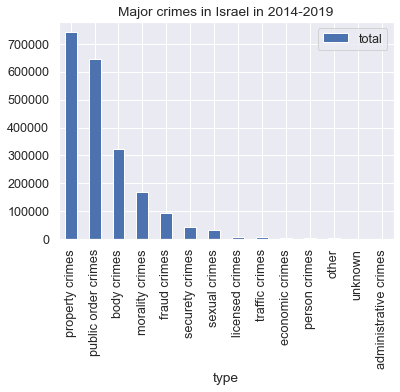

In [310]:
#plot crime types by number of crimes
crime_type.plot(x='type', y='total', kind='bar', title= 'Major crimes in Israel in 2014-2019')
plt.show()

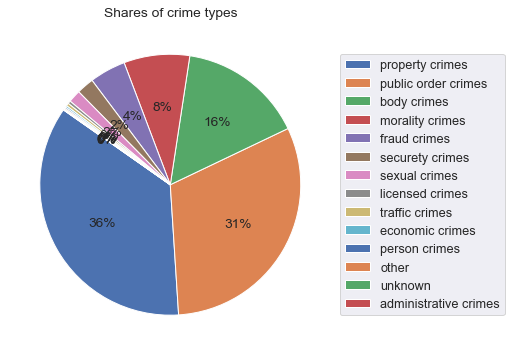

In [311]:
# plot pie chart with proportions of crime type
plt.figure(figsize=(10, 6))
labels = crime_type['type']
plt.pie(crime_type['total'], autopct='%0.f%%',startangle=145)
plt.legend(labels, loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Shares of crime types')
plt.show()

From the figurs above, it can be seen that property crime is the most common type of crime (36% of all crimes).
Following is the public order crime (31%).
Administrative crime is the less common type of crime. 

#### Correlation

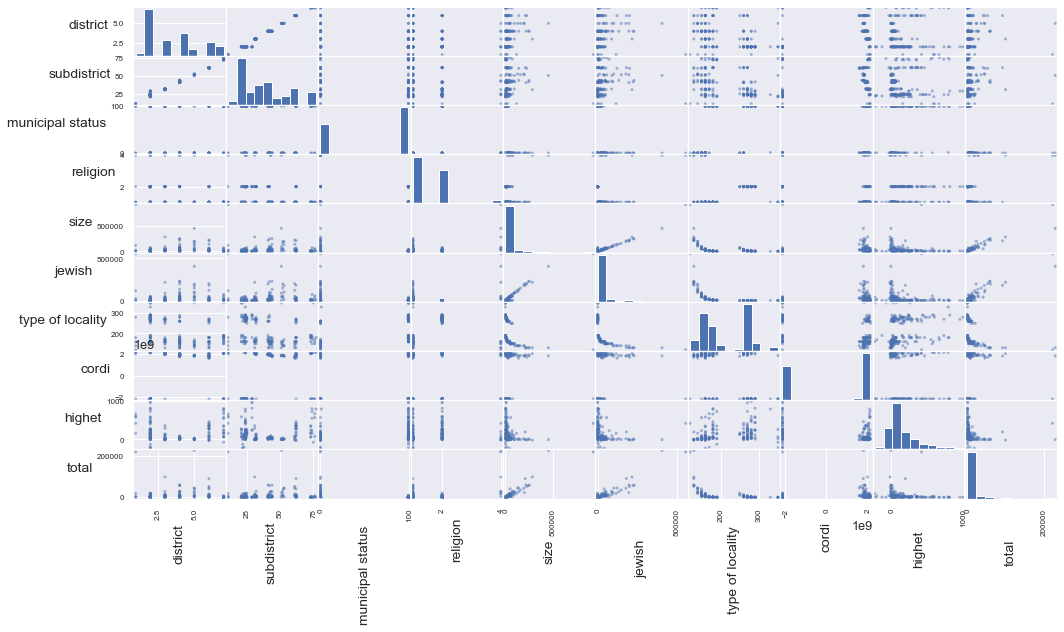

,district,subdistrict,municipal status,religion,size,jewish,type of locality,cordi,highet,total
district,1.000000,0.995124,-0.164621,-0.369671,0.047730,0.123469,-0.402995,0.511148,0.037840,0.063450
subdistrict,0.995124,1.000000,-0.141753,-0.354906,0.029218,0.103148,-0.379999,0.468709,0.080190,0.044041
municipal status,-0.164621,-0.141753,1.000000,0.069276,-0.431576,-0.478792,0.556903,-0.263272,0.318972,-0.404747
religion,-0.369671,-0.354906,0.069276,1.000000,0.238977,0.110414,0.389282,-0.277754,0.110709,0.311053
size,0.047730,0.029218,-0.431576,0.238977,1.000000,0.964218,-0.398566,0.135270,-0.103966,0.932400
jewish,0.123469,0.103148,-0.478792,0.110414,0.964218,1.000000,-0.513371,0.212788,-0.151290,0.923726
type of locality,-0.402995,-0.379999,0.556903,0.389282,-0.398566,-0.513371,1.000000,-0.496696,0.247988,-0.370194
cordi,0.511148,0.468709,-0.263272,-0.277754,0.135270,0.212788,-0.496696,1.000000,-0.244370,0.133182
highet,0.037840,0.080190,0.318972,0.110709,-0.103966,-0.151290,0.247988,-0.244370,1.000000,-0.122328
total,0.063450,0.044041,-0.404747,0.311053,0.932400,0.923726,-0.370194,0.133182,-0.122328,1.000000


In [312]:
#build sactter plot and calculate correlation
crimes_total_corr = total_crime[['district', 'subdistrict', 'municipal status','religion', 'size', 'jewish', 'type of locality','cordi', 'highet', 'total']]
axes = pd.plotting.scatter_matrix(crimes_total_corr, figsize=(15,9),grid=True)

for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()


crimes_total_corr.corr()

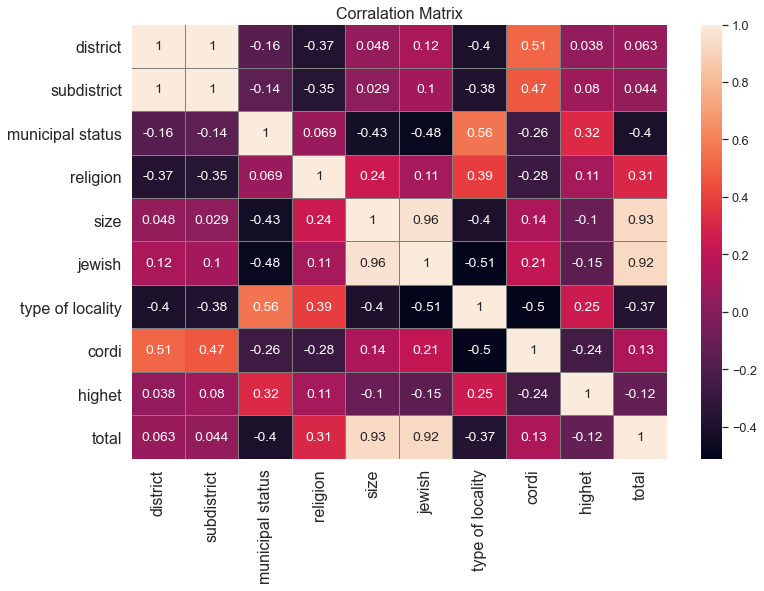

In [313]:
cor_matrix = total_crime[['district', 'subdistrict', 'municipal status','religion', 'size', 'jewish', 'type of locality','cordi', 'highet', 'total']].corr()

plt.figure(figsize=(12,8))
sns.set(font_scale=1.15)
heat = sns.heatmap(cor_matrix, annot=True, linewidths=0.01,linecolor='grey')
plt.tick_params(labelsize=16)
plt.title('Corralation Matrix',fontdict={'fontsize':16})
plt.show()

From the correlation matrix above, it seems that there is a strong correlation between population size and number of jewish and the number of crimes over all years. The larger the settlement, the higher the number of crimes in it.
In adittion there is some correlation between the type pf localilty, and the subdistrict and district and a little bit corraltion between religion and total number of crimes.

In [314]:
df = df_merge[df_merge.type != 'Total']
mapping = {val: idx for idx, val in enumerate(df_merge['type'].unique())}
df['type'] = df['type'].map(mapping)
df.set_index('cityName',inplace=True)
df

,cityCode,district,subdistrict,municipal status,religion,size,jewish,type of locality,cordi,highet,type,total,2019,2018,2017,2016,2015,2014
cityName,,,,,,,,,,,,,,,,,,
Abu Ghosh,472,1,11,99,2,7543,79,280,2105263481,598,1,4,2,2,0,0,0,0
Abu Ghosh,472,1,11,99,2,7543,79,280,2105263481,598,2,55,7,9,8,6,15,10
Abu Ghosh,472,1,11,99,2,7543,79,280,2105263481,598,3,3,1,0,0,0,2,0
Abu Ghosh,472,1,11,99,2,7543,79,280,2105263481,598,4,60,14,5,11,6,8,16
Abu Ghosh,472,1,11,99,2,7543,79,280,2105263481,598,5,575,93,91,94,95,87,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tel Sheva,1054,6,62,99,2,20204,20,260,1867057304,280,9,1107,179,188,202,189,171,178
Tel Sheva,1054,6,62,99,2,20204,20,260,1867057304,280,10,2112,427,444,344,316,262,319
Tel Sheva,1054,6,62,99,2,20204,20,260,1867057304,280,11,41,6,10,9,8,1,7


In [315]:
df_merge['crime code']=df_merge['type'].astype("category").cat.codes

In [316]:
df_crimes_per_city= df_merge.pivot_table(index='cityName', columns='type', values='total')
df_crimes_per_city.drop(['Total'], axis='columns', inplace=True)
df_crimes_per_city = df_crimes_per_city.merge(df_cities, on = ['cityName'] , how='inner').reset_index()
df_crimes_per_city.drop(['cityName_heb' , 'cityCode', 'index'], axis='columns', inplace=True)

df_crimes_per_city =df_crimes_per_city.fillna(0)
df_crimes_per_city.set_index('cityName',inplace=True)
df_crimes_per_city

,administrative crimes,body crimes,economic crimes,fraud crimes,licensed crimes,morality crimes,other,person crimes,property crimes,public order crimes,...,unknown,district,subdistrict,municipal status,religion,size,jewish,type of locality,cordi,highet
cityName,,,,,,,,,,,,,,,,,,,,,
Abu Ghosh,0.0,714.0,3.0,61.0,8.0,60.0,3.0,8.0,575.0,1171.0,...,4.0,1,11,99,2,7543,79,280,2105263481,598
Abu Sinan,0.0,423.0,1.0,30.0,11.0,225.0,2.0,5.0,458.0,830.0,...,2.0,2,24,99,2,13915,11,270,-2147483648,19
Afula,3.0,2872.0,36.0,697.0,41.0,1704.0,13.0,30.0,6588.0,5830.0,...,25.0,2,23,0,1,51737,46291,150,-2147483648,54
Akko,5.0,2978.0,27.0,708.0,23.0,3180.0,9.0,32.0,6582.0,5747.0,...,22.0,2,24,0,4,48930,29537,160,2082275927,-2
Alfe Menashe,0.0,124.0,1.0,46.0,3.0,74.0,1.0,2.0,259.0,302.0,...,2.0,7,73,99,1,7865,7589,180,2014467560,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yoqne'am Illit,1.0,480.0,4.0,92.0,6.0,485.0,2.0,5.0,1326.0,1047.0,...,7.0,2,23,0,1,23311,21259,160,2091772807,57
Zarzir,0.0,427.0,1.0,39.0,11.0,35.0,2.0,9.0,509.0,817.0,...,2.0,2,23,99,2,7942,14,280,-2147483648,137
Zefat,1.0,1460.0,21.0,311.0,43.0,1399.0,6.0,4.0,2543.0,2671.0,...,7.0,2,21,0,1,35715,32971,160,-2147483648,176


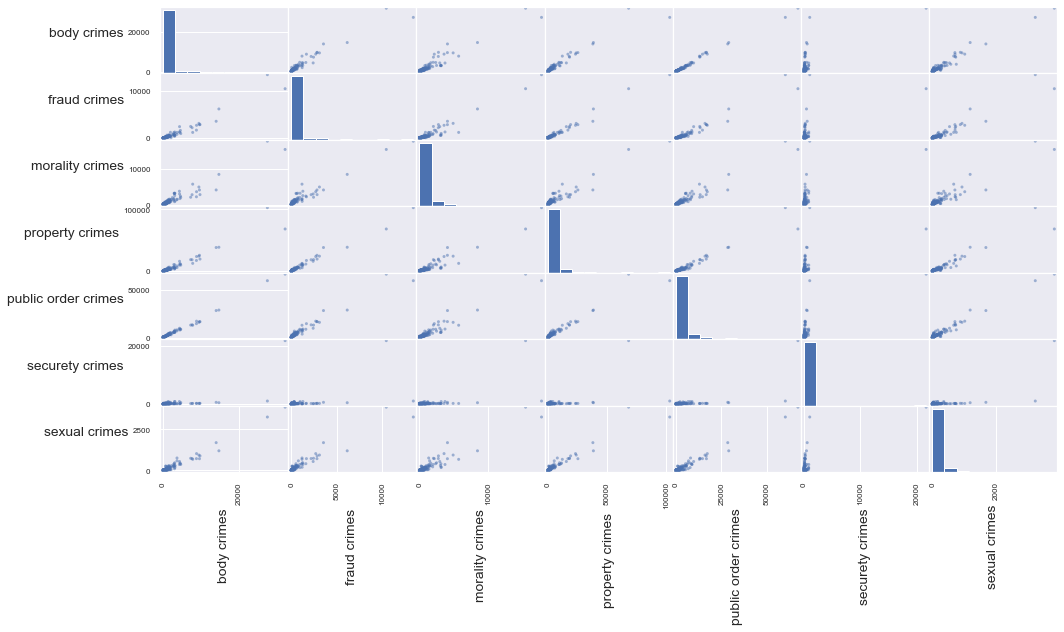

,body crimes,fraud crimes,morality crimes,property crimes,public order crimes,securety crimes,sexual crimes
body crimes,1.000000,0.962475,0.955393,0.961366,0.995404,0.641202,0.980759
fraud crimes,0.962475,1.000000,0.964278,0.988931,0.973129,0.560580,0.956930
morality crimes,0.955393,0.964278,1.000000,0.953221,0.962745,0.584389,0.941692
property crimes,0.961366,0.988931,0.953221,1.000000,0.968753,0.497523,0.955426
public order crimes,0.995404,0.973129,0.962745,0.968753,1.000000,0.656881,0.984127
securety crimes,0.641202,0.560580,0.584389,0.497523,0.656881,1.000000,0.670454
sexual crimes,0.980759,0.956930,0.941692,0.955426,0.984127,0.670454,1.000000


In [317]:
# we chose the top 10 crimes type in order to check correlation
df_crimes_per_city_cor = df_crimes_per_city[['body crimes','fraud crimes','morality crimes','property crimes','public order crimes','securety crimes','sexual crimes']]
axes = pd.plotting.scatter_matrix(df_crimes_per_city_cor, figsize=(15,9),grid=True)

for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()

df_crimes_per_city_cor.corr()


In the crime correllation matrix above we presented the top 10 crimes.
It can be seen  that there are strong correlation betweem most of the crimes.

#### District

In [318]:
#group crime by district
crimes_per_district = df_merge[df_merge.type != 'Total']
crimes_per_district = crimes_per_district.groupby(['district'])['type', 'total','2019','2018','2017','2016','2015','2014'].sum().reset_index()
crimes_per_district

<ipython-input-318-d333fed2bd66>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  crimes_per_district = crimes_per_district.groupby(['district'])['type', 'total','2019','2018','2017','2016','2015','2014'].sum().reset_index()


,district,total,2019,2018,2017,2016,2015,2014
0,1,249726,37923,42785,42369,39262,42417,44970
1,2,288043,47733,49275,49742,47513,46631,47149
2,3,266408,39869,43526,44766,42311,46612,49324
3,4,448989,63339,72323,76341,77267,78556,81163
4,5,439899,66071,68602,69852,74646,78555,82173
5,6,349677,58396,59035,57233,57642,58414,58957
6,7,30940,4554,5418,5377,5169,5063,5359


[Text(0.5, 0, 'District'), Text(0, 0.5, 'Number of crimes')]

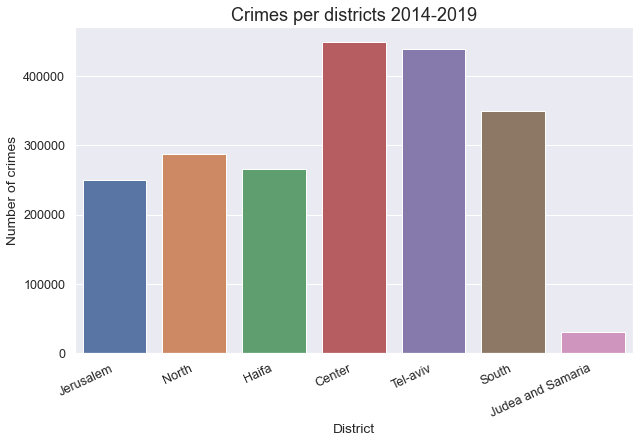

In [319]:
#plot crime per discrit
plt.figure(figsize=(10,6))
b = sns.barplot(data = crimes_per_district, x='district', y='total')
plt.title("Crimes per districts 2014-2019",fontsize=18)
b.set_xticklabels(b.get_xticklabels(), rotation=25, horizontalalignment='right')
b.set_xticklabels(['Jerusalem', 'North', 'Haifa', 'Center', 'Tel-aviv', 'South', 'Judea and Samaria'])
b.set(xlabel='District', ylabel='Number of crimes')

The Center district is the district with the highest number of crime cases in years 2014-2019.
Following is Tel Aviv district.
Judea and Samaria area is the district with the lowest number of crime cases in these years.

#### Municipal status

In [320]:
#group by municipal status
crimes_per_municipal = df_merge[df_merge.type != 'Total']
crimes_per_municipal = crimes_per_municipal.groupby(['municipal status'])['type', 'total','2019','2018','2017','2016','2015','2014'].sum().reset_index()
crimes_per_municipal

<ipython-input-320-39140b6e70cb>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  crimes_per_municipal = crimes_per_municipal.groupby(['municipal status'])['type', 'total','2019','2018','2017','2016','2015','2014'].sum().reset_index()


,municipal status,total,2019,2018,2017,2016,2015,2014
0,0,1824119,276559,297356,303286,302932,315455,328531
1,1,821,104,106,152,152,156,151
2,99,248742,41222,43502,42242,40726,40637,40413


[Text(0.5, 0, 'municipal status'), Text(0, 0.5, 'Number of crimes')]

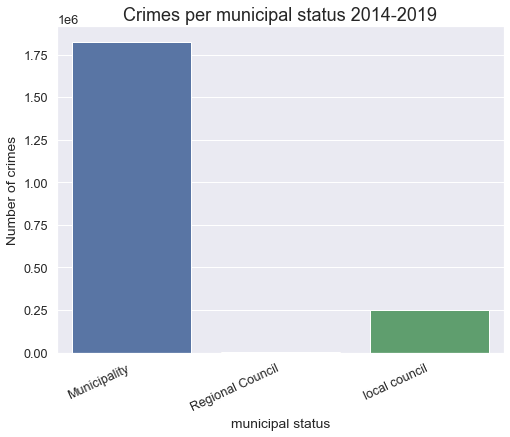

In [321]:
# plot crimes per municipal status
plt.figure(figsize=(8,6))
b = sns.barplot(data = crimes_per_municipal, x='municipal status', y='total')
plt.title("Crimes per municipal status 2014-2019",fontsize=18)
b.set_xticklabels(b.get_xticklabels(), rotation=25, horizontalalignment='right')
b.set_xticklabels(['Municipality', 'Regional Council', 'local council'])
b.set(xlabel='municipal status', ylabel='Number of crimes')

Municipality has the highest number of crime cases in years 2014-2019.

#### Type of locality

In [322]:
#group by type of locality
crimes_per_locality = df_merge[df_merge.type != 'Total']
crimes_per_locality['crime_per_pop'] = crimes_per_locality['total'] / crimes_per_locality['size'] 
crimes_per_locality = crimes_per_locality.groupby(['type of locality'])['size', 'total', 'crime_per_pop'].sum().reset_index()
#crimes_per_locality['crime_per_pop'] = crimes_per_locality['total'] / crimes_per_locality['size']
crimes_per_locality

<ipython-input-322-2d60d25402cc>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  crimes_per_locality = crimes_per_locality.groupby(['type of locality'])['size', 'total', 'crime_per_pop'].sum().reset_index()


,type of locality,size,total,crime_per_pop
0,120,13791570,221606,0.241023
1,130,28455093,651026,2.285545
2,140,17645062,266262,1.844041
3,150,17078661,291707,4.443179
4,160,17815133,300296,9.153669
5,170,2592859,39372,2.601560
6,180,1973084,30560,4.164737
7,190,331589,5931,1.578657
8,250,3151416,46441,0.677499
9,260,6088859,100808,3.639845


[Text(0.5, 0, 'type of locality'),
 Text(0, 0.5, 'Number of crimes per population')]

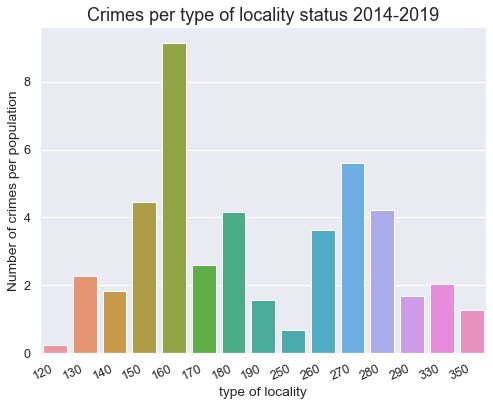

In [323]:
# plot crimes per type of locality
plt.figure(figsize=(8,6))
b = sns.barplot(data = crimes_per_locality, x='type of locality', y='crime_per_pop')
plt.title("Crimes per type of locality status 2014-2019",fontsize=18)
b.set_xticklabels(b.get_xticklabels(), rotation=25, horizontalalignment='right')
#b.set_xticklabels(['Municipality', 'Regional Council', 'local council'])
b.set(xlabel='type of locality', ylabel='Number of crimes per population')

Jewish settlements 49999-20000 residents (code 160) has the highest number of crime cases per population in years 2014-2019.

#### Crimes Per Year

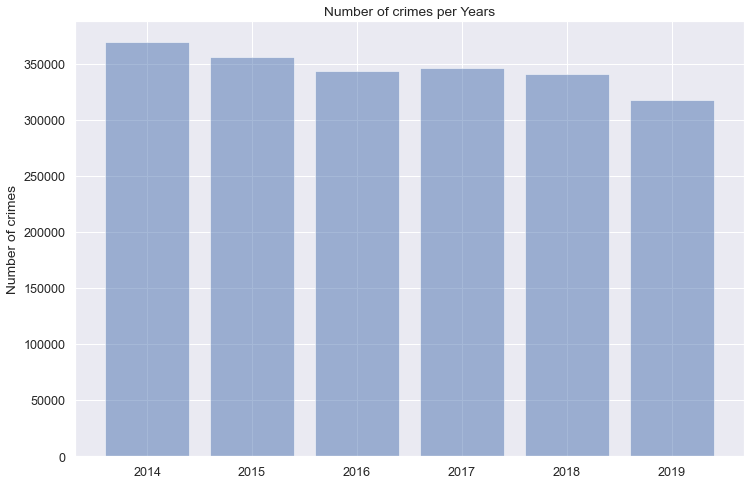

In [324]:
crime_type_2014 = crime_type['2014'].sum()
crime_type_2015 = crime_type['2015'].sum()
crime_type_2016 = crime_type['2016'].sum()
crime_type_2017 = crime_type['2017'].sum()
crime_type_2018 = crime_type['2018'].sum()
crime_type_2019 = crime_type['2019'].sum()
unique_crime_year = '2014','2015', '2016', '2017', '2018','2019'
number_crime_year = [crime_type_2014, crime_type_2015, crime_type_2016, crime_type_2017,crime_type_2018, crime_type_2019]


objects = unique_crime_year
y_pos = np.arange(len(objects))
performance = number_crime_year
 
plt.figure(figsize=(12,8))    
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Number of crimes') 
plt.title("Number of crimes per Years")
plt.show()

From the figure above it seems that there is some deacrise in number of crimes per year.

## 3. Clustering 

In this section I used 2 clustering algorythm:  K-mean and MeanShift. 

### K-means

In [328]:
#df1  = df1[df1['property crimes'] <1]
df_crimes_per_city['size'].describe()
df_crimes_per_city = df_crimes_per_city[df_crimes_per_city['size']<400000]
len(df_crimes_per_city)

199

In [378]:
from sklearn import preprocessing

df3 = total_crime.copy()
df3 = df3.set_index('cityName')
df3 = df3[['total','jewish','type of locality', 'subdistrict', 'size']]
#df3 = df3[['total','jewish', 'size']]


#normalize number of crimes per population
df3['crime_ratio'] = df3['total'] / df3['size']
#df3['jewish'] = df3['jewish'] / df3['size']

#removing outliers
df3  = df3[df3['jewish'] <300000]
df3  = df3[df3['crime_ratio'] <1]
df3_standardized = preprocessing.scale(df3)
df3_standardized = pd.DataFrame(df3_standardized)


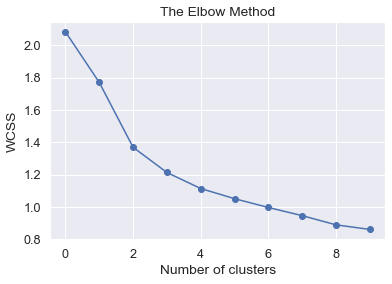

In [379]:
# find the best k for kmeans
distortions = []
for k in range(1, 11):
    model = KMeans(n_clusters=k, max_iter=10000)
    model.fit(df3_standardized)
    distortions.append(sum(np.min(cdist(df3_standardized, model.cluster_centers_, 'euclidean'), axis=1)) / df3_standardized.shape[0])
plt.plot(distortions, marker="o")
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

There are 3 cluster from the Elbow Method.

In [380]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(df3_standardized)


#beginning of  the cluster numbering with 1 instead of 0
y_kmeans1=y_kmeans+1

# New list called cluster
cluster = list(y_kmeans1)
# Adding cluster to our data set
df3['cluster'] = cluster
#Mean of clusters 1 to 6
kmeans_mean_cluster = pd.DataFrame(round(df3.groupby('cluster').mean(),1))
kmeans_mean_cluster


,total,jewish,type of locality,subdistrict,size,crime_ratio
cluster,,,,,,
1,7368.3,27375.2,167.3,45.4,30679.3,0.2
2,53881.8,177991.5,135.0,49.7,199510.3,0.3
3,2836.6,276.3,274.6,29.3,13451.6,0.2


Text(0, 0.5, 'Average crimes per population')

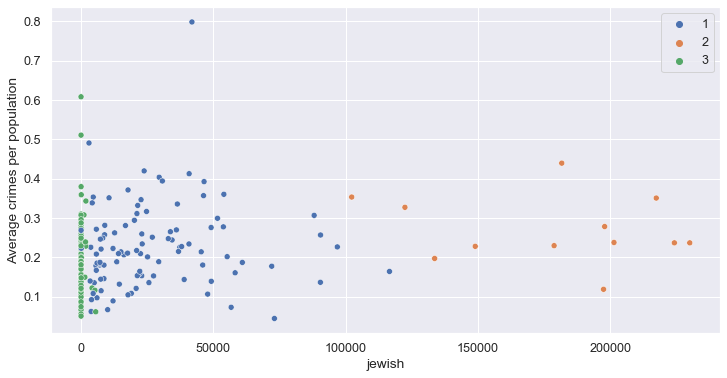

In [381]:
import seaborn as sns

plt.figure(figsize=(12,6))
sns.scatterplot(x=df3['jewish'], y = df3['crime_ratio']  ,hue=y_kmeans1, palette="deep")
#plt.xlim([0,250000])
#plt.ylim([0,0.7])
plt.xlabel('jewish')
plt.ylabel('Average crimes per population')

From the figure above it can be seen that there are 3 main clusters among the first algorithm: there are localities with no Jewish population (this can be seen in the green cluster).
It can be seen that the higher the number of Jews, the average crime per person does not sagnificantlly change. What can be deduced from this (from the fact that we have shown that the larger the size of the population, the higher the level of crime) is that the Jews do not significantly affect the level of crime-Therefore probably other religions influence the level of crime.

From the table above we can conclude that cluster number 2 (the orange) has the higest Jewish Population and also has the higest crimes per population rate.


#### Present the cities in each cluster

In [353]:
#cities in cluster #1
df3[df3['cluster']==1]

,total,jewish,type of locality,subdistrict,size,crime_ratio,cluster
cityName,,,,,,,
Abu Ghosh,2709,79,280,11,7543,0.359141,1
Abu Sinan,2081,11,270,24,13915,0.149551,1
Ar'ara,4269,13,260,32,24904,0.171418,1
Ar'ara-BaNegev,3705,1,270,62,17640,0.210034,1
Arrabe,4959,0,260,24,25369,0.195475,1
...,...,...,...,...,...,...,...
Yavne'el,1453,4235,190,22,4294,0.338379,1
Yesud HaMa'ala,411,1681,350,21,1719,0.239092,1
Yirka,2511,70,270,24,17003,0.147680,1


In [273]:
#cities in cluster #2
df3[df3['cluster']==2]

,total,jewish,size,crime_ratio,cluster
cityName,,,,,
Abu Ghosh,2709,79,7543,0.359141,2
Afula,18461,46291,51737,0.356824,2
Akko,19749,29537,48930,0.403617,2
Arad,8780,21427,26451,0.331935,2
Ashqelon,46113,122393,140968,0.327117,2
Bat Yam,45490,102268,128774,0.353255,2
Bet She'an,6767,17757,18227,0.371262,2
Dimona,13452,30733,34135,0.394082,2
Elat,41471,41906,51935,0.798517,2


In [274]:
#cities in cluster #3
df3[df3['cluster']==3]

,total,jewish,size,crime_ratio,cluster
cityName,,,,,
Ashdod,53395,201388,224628,0.237704,3
Be'er Sheva,91849,181644,209002,0.439465,3
Bene Beraq,23596,197439,198863,0.118655,3
Haifa,99470,217360,283640,0.350691,3
Holon,44619,178754,194273,0.229672,3
Jerusalem,221606,555845,919438,0.241023,3
Netanya,60441,197860,217244,0.278217,3
Petah Tiqwa,57842,224209,244275,0.236791,3
Ramat Gan,36270,148955,159159,0.227885,3


##### further invastigation on property crimes type since it is the major crime type 

In [384]:
from sklearn import preprocessing

df1 = df_crimes_per_city.copy()

#df1 = df1[['property crimes', 'subdistrict', 'municipal status','religion', 'size']]

df1 = df1[['property crimes','jewish','type of locality', 'subdistrict', 'size']]
#df3 = df3[['total','jewish', 'size']]


#normalize number of crimes per population
df1['crime_ratio'] = df1['property crimes'] / df1['size']
#df3['jewish'] = df3['jewish'] / df3['size']

#removing outliers
df1  = df1[df1['jewish'] <300000]
df1  = df1[df1['crime_ratio'] <1]


df1_standardized = preprocessing.scale(df1)
df1_standardized = pd.DataFrame(df1_standardized)

In order to evalute the number of k clusters we used elbow plot.

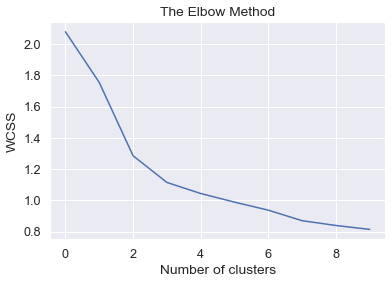

In [385]:
# find the best k for kmeans
#df1 = df[['district','municipal status','total', 'type']]
distortions = []
for k in range(1, 11):
    model = KMeans(n_clusters=k, max_iter=10000)
    model.fit(df1_standardized)
    distortions.append(sum(np.min(cdist(df1_standardized, model.cluster_centers_, 'euclidean'), axis=1)) / df1_standardized.shape[0])
plt.plot(distortions)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The scree plot levels off at k=3. Ee will use it to determine the clusters

In [386]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(df1_standardized)


#beginning of  the cluster numbering with 1 instead of 0
y_kmeans1=y_kmeans+1

# New list called cluster
cluster = list(y_kmeans1)
# Adding cluster to our data set
df1['cluster'] = cluster
#Mean of clusters 1 to 3
kmeans_mean_cluster = pd.DataFrame(round(df1.groupby('cluster').mean(),1))
kmeans_mean_cluster

,property crimes,jewish,type of locality,subdistrict,size,crime_ratio
cluster,,,,,,
1,637.5,276.5,274.5,29.6,13515.0,0.0
2,21586.8,177991.5,135.0,49.7,199510.3,0.1
3,2575.6,27375.0,167.4,45.1,30623.6,0.1


In [1936]:
#cities in cluster #1
df1[df1['cluster']==1]

,property crimes,subdistrict,municipal status,religion,size,cluster
cityName,,,,,,
Abu Ghosh,575.0,11,99,2,7543,1
Abu Sinan,458.0,24,99,2,13915,1
Alfe Menashe,259.0,73,99,1,7865,1
Ar'ara,1098.0,32,99,2,24904,1
Ar'ara-BaNegev,680.0,62,99,2,17640,1
...,...,...,...,...,...,...
Yesud HaMa'ala,134.0,21,99,1,1719,1
Yirka,637.0,24,99,2,17003,1
Zarzir,509.0,23,99,2,7942,1


In [1937]:
#cities in cluster #2

df1[df1['cluster']==2]

,property crimes,subdistrict,municipal status,religion,size,cluster
cityName,,,,,,
Ashdod,19396.0,61,0,1,224628,2
Ashqelon,17122.0,61,0,1,140968,2
Bat Yam,18278.0,53,0,1,128774,2
Be'er Sheva,38168.0,62,0,1,209002,2
Bene Beraq,8205.0,52,0,1,198863,2
Haifa,38606.0,31,0,4,283640,2
Holon,18509.0,53,0,1,194273,2
Netanya,25546.0,41,0,1,217244,2
Petah Tiqwa,23523.0,42,0,1,244275,2


In [1938]:
#cities in cluster #3
df1[df1['cluster']==3]

,property crimes,subdistrict,municipal status,religion,size,cluster
cityName,,,,,,
Afula,6588.0,23,0,1,51737,3
Akko,6582.0,24,0,4,48930,3
Arad,2771.0,62,0,1,26451,3
Ari'el,1137.0,73,0,1,20456,3
Arrabe,1097.0,24,0,2,25369,3
...,...,...,...,...,...,...
Umm al-Fahm,2583.0,32,0,2,55182,3
Yavne,3747.0,44,0,1,46705,3
Yehud,2258.0,42,0,1,29930,3


<AxesSubplot:xlabel='jewish', ylabel='property crimes'>

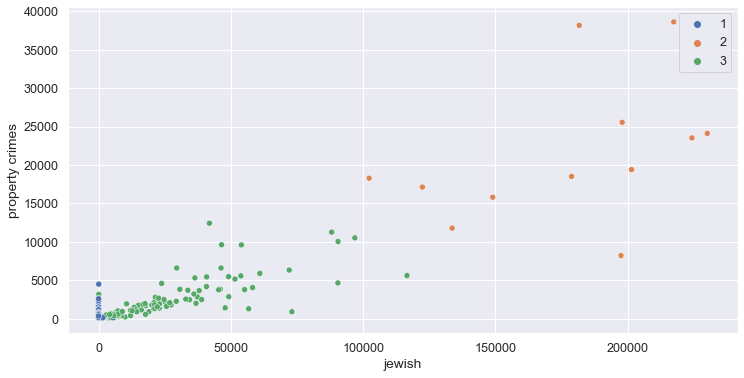

In [387]:
import seaborn as sns

plt.figure(figsize=(12,6))
sns.scatterplot(x=df1['jewish'], y = df1['property crimes']  ,hue=y_kmeans1, palette="deep")
#plt.xlim([0,300000])
#plt.ylim([0,30000])

From the figure above it can be seen that cluster 1 (blue) are citieas with the smallest number of Jewish population and this cluster has the smallest number of avereage property crimes per population. 
It can be seen that the higher the number of Jews, the average  property crimes per population per person increases.
This is very intersting, that althogh we couldn't find any concetion between the amount of total crime among the Jewish sector there is a diffrence in the propert crime type.

### mean shift

number of estimated clusters : 6


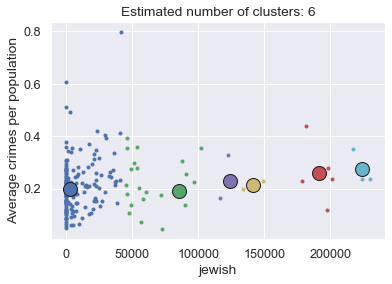

In [421]:
# counter=0
# for k in data

df2 = total_crime[['size', 'total']]


# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
# import sklearn.datasets
# X, _ = sklearn.datasets.make_blobs(n_samples=10000, centers=centers, cluster_std=0.6)
# print(total_crime.head())
#X = total_crime.iloc[:,[8,9,10]].to_numpy()

df2 = total_crime[['jewish', 'total', 'size']]
df2['ratio'] = total_crime['total']/total_crime['size']
df2 = df2[['jewish', 'ratio',]]

df2 = df2.to_numpy()
#X_standardized = preprocessing.scale(X)
#X_standardized = pd.DataFrame(X_standardized)

# #############################################################################
# Compute clustering with MeanShift

# The following bandwidth can be automatically detected using
bandwidth = sklearn.cluster.estimate_bandwidth(df2, quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(df2)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

# #############################################################################
# Plot result
import matplotlib.pyplot as plt
from itertools import cycle

plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(df2[my_members, 0], df2[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.xlabel('jewish')
plt.ylabel('Average crimes per population')
plt.show()


It can be seen that with the mean shift algorithm we have 6 centers compared to the first algorithm (there are 3 centers) completely unnecessary as there are hardly any observations around the three additional clusters that have been added
It can be seen that the distribution of observations is done in a slightly different way compared to the first algorithm. -The blue cluster represents a higher number of observations than the first algorithm -Average from the center is larger which divides our observations in a more concentrated way -Characteristic of this algorithm

In the following algorithm we added another feature: city code to see if there is an effect on two passions we have already tested (for axis X, Y there is an effect, this can be seen in the first graph). It can be seen that the city code shows us the demographic representation only in the heart of the data and that the dispersal of the Jews in the various cities is wide. It can be seen that there are cities where there are relatively very few Jews. What can be deduced from this is that the dispersal of Jews in the various cities is relatively constant as well, the average amount of crimes per person is also constant and therefore the hypothesis that other religions commit more crimes can be strengthened.

#### Comparing K-mean and MeanShift

In [416]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn import datasets

kmeans_evaluation=metrics.silhouette_score(df1[['property crimes','jewish','type of locality', 'subdistrict', 'size']],df1['cluster'],metric='euclidean')
means_shift_evaluation=metrics.silhouette_score(df3[['total','jewish','type of locality', 'subdistrict', 'size']],df3['cluster'],metric='euclidean')


print("kmeans_evaluation"+str(kmeans_evaluation))
print("means_shift_evaluation"+str(means_shift_evaluation))

kmeans_evaluation0.27766002587889943
means_shift_evaluation0.27012051255683034


##### In conclusion:
It can be said that algorithm K-means is little bit better than algorithm mean shift because there are a lot of groups of meaningless clusters. There is a more specific grouping that describes and fits more with algorithm K-means Also algorithm K-means shows higher accuracy than algorithm mean shift (although the delta is reflected in low numbers, there is still some improvement in the algorithm).

## 4. Predicting second common crime type in 2019 using Random forest

In this section I predicted the second common crime type in 2019 in the cities: Karmi'el, Netanya, Kafar Yasif, Rosh HaAyin,Metula,Betar Illit using random forest algorithm.

In [393]:
df = df_merge[df_merge.type != 'Total']
cities = ["Karmi'el", 'Netanya', 'Kafar Yasif', 'Rosh HaAyin','Metula','Betar Illit']
data_cities = df.loc[df['cityName'].isin(cities)]
data = df.loc[~df['cityName'].isin(cities)]
x_train= data[['type of locality', 'subdistrict', 'municipal status','religion', 'size','2018','2017','2016','2015','2014']]
y_train= data['2019']
x_test = data_cities[['type of locality', 'subdistrict', 'municipal status','religion', 'size','2018','2017','2016','2015','2014']]
y_test = data_cities['2019']

# create a StandardScaler object and apply it to the train set
scaler = StandardScaler() 

# train the scaler and transform the matrix for the train set
x_train_st = scaler.fit_transform(x_train) 

# apply standardization to the feature matrix for the test set
x_test_st = scaler.transform(x_test)


In [394]:
# Create the parameter grid based on the results of random search 
param_grid ={
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

rf = RandomForestRegressor(random_state = RSEED)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search.fit(x_train_st, y_train)

print(grid_search.best_params_)


best_grid = grid_search.best_estimator_


y_pred = best_grid.predict(x_test_st)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),2))
# Print out the Mean Squared Error (mse)
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
# Print out Root Mean Squared Error (rmse)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   48.8s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  4.8min finished


{'bootstrap': True, 'max_depth': 80, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 200}
Mean Absolute Error: 21.25
Mean Squared Error: 6210.985581335381
Root Mean Squared Error: 78.80980637798433


#### Feature Importances

In [396]:
fi = pd.DataFrame({'feature': list(x_train.columns),
                   'importance': best_grid.feature_importances_}).\
                    sort_values('importance', ascending = False)
fi

,feature,importance
5,2018,0.300623
7,2016,0.214976
6,2017,0.185870
8,2015,0.149729
9,2014,0.123705
4,size,0.013198
0,type of locality,0.009671
3,religion,0.001666
1,subdistrict,0.000346
2,municipal status,0.000215


From the table above it can be seen that the demographic featurs are much less importent then the crime features.
We notice that the crime features might have cuse some overfitting to our model due to their high correlation.

In [395]:
actual_predicted_data_rf = pd.DataFrame({'Actual': y_test, 'Predicted': np.round(y_pred,decimals=0)})
actual_predicted_data_rf['cityName'] = data_cities['cityName']
actual_predicted_data_rf['Predicted type'] = data_cities['type']
actual_predicted_data_rf.reset_index()
actual_predicted_data_rf = actual_predicted_data_rf[['cityName', 'Predicted type', 'Predicted', 'Actual']]

#sort by city name
actual_predicted_data_rf = actual_predicted_data_rf.groupby(["cityName"]).apply(lambda x: x.sort_values(["Predicted"], ascending = False)).reset_index(drop=True)

#extract seconed common crime type
actual_predicted_data_rf= actual_predicted_data_rf.groupby("cityName").nth(1).dropna().reset_index()

data_cities_actual = data_cities.groupby(["cityName"]).apply(lambda x: x.sort_values(["2019"], ascending = False)).reset_index(drop=True)
data_cities_actual = data_cities_actual.groupby("cityName").nth(1).dropna().reset_index()
data_cities_actual = data_cities_actual[['cityName', 'type']]
data_cities_actual = data_cities_actual.rename(columns = {'type': 'Actual type'})

actual_predicted_data_rf = actual_predicted_data_rf.merge(data_cities_actual, on=['cityName'], how='inner')
actual_predicted_data_rf[['cityName', 'Predicted', 'Actual', 'Predicted type', 'Actual type']]

,cityName,Predicted,Actual,Predicted type,Actual type
0,Betar Illit,191.0,230,public order crimes,public order crimes
1,Kafar Yasif,122.0,121,morality crimes,morality crimes
2,Karmi'el,434.0,474,property crimes,property crimes
3,Metula,11.0,9,public order crimes,public order crimes
4,Netanya,2489.0,2354,public order crimes,public order crimes
5,Rosh HaAyin,627.0,614,property crimes,public order crimes


The table above present the results of second common pridcited crime type in 2019 comapred to the actual.
It can be seen that the model was very accurated and had only one mistake at Rosh HaAyin.

## 5. predicting number of crimes in 2019 using AdaBoost 

In this section I  predicted the total number of crimes in 2019 for the localities: Kiryat Ata, Rosh Pina, Eilat, Sakhnin and Beer Sheva Using ADABOOST.

In [388]:
cities = ['Qiryat Atta', 'Rosh Pinna', 'Elat', 'Sakhnin',"Be'er Sheva"]
data_cities = total_crime.loc[total_crime['cityName'].isin(cities)]
data = total_crime.loc[~total_crime['cityName'].isin(cities)]

#Declare feature vector and target variable
#x= total_crime[['size', 'religion', 'district', 'municipal status', '2018','2017','2016','2015','2014']]
x_train= data[['district', 'subdistrict', 'municipal status','religion', 'size', '2018','2017','2016','2015','2014']]
y_train= data['2019']
x_test = data_cities[['district', 'subdistrict', 'municipal status','religion', 'size','2018','2017','2016','2015','2014']]
y_test = data_cities['2019']


# create a StandardScaler object and apply it to the train set
scaler = StandardScaler() 

# train the scaler and transform the matrix for the train set
x_train_st = scaler.fit_transform(x_train) 

# apply standardization to the feature matrix for the test set
x_test_st = scaler.transform(x_test)

params = {
 'n_estimators': [50, 100, 200],
 'learning_rate' : [0.01, 0.05, 0.1, 0.5, 1],
 'loss' : ['linear', 'square', 'exponential']
 }

#creat adaboost classifier object
#abc=AdaBoostClassifier(n_estimators=50,learning_rate=1, random_state=0)
ada_reg=AdaBoostRegressor(random_state = RSEED)

gridsearch=GridSearchCV(ada_reg, params, cv=5, n_jobs = -1, verbose = 2)
# Fit the grid search to the data

gridsearch.fit(x_train, y_train)

print(gridsearch.best_params_)

best_grid = gridsearch.best_estimator_


Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:   16.6s finished


{'learning_rate': 0.5, 'loss': 'exponential', 'n_estimators': 200}


In [390]:
AdaBoostRegressor(base_estimator=None, learning_rate=0.5, loss='exponential',
         n_estimators=100, random_state=None)


best_grid.fit(x_train,y_train)

#predict the response for test dataset
y_pred = best_grid.predict(x_test)


# check prediction accuracy r**2
accuracy = best_grid.score(x_test, y_test)
print("Accuracy: %.2f" % accuracy)


#print("AdaBoost Classifier Model Accuracy:" ,accuracy_score(y_test, y_pred))
scores = cross_val_score(ada_reg, x_train,y_train,cv=5)
print("Mean cross-validataion score: %.2f" % scores.mean())

#MSE and RMSE accuracy metrics
#y_pred = ada_reg.predict(x_test)
mse = mean_squared_error(y_test,y_pred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % np.sqrt(mse))


Accuracy: 0.80
Mean cross-validataion score: 0.95
MSE: 6243702.86
RMSE: 2498.74


#### Feature Importances

In [392]:
fi = pd.DataFrame({'feature': list(x_train.columns),
                   'importance': best_grid.feature_importances_}).\
                    sort_values('importance', ascending = False)
fi

,feature,importance
5,2018,0.232388
6,2017,0.187217
8,2015,0.177103
9,2014,0.161302
7,2016,0.113915
4,size,0.098510
1,subdistrict,0.016604
0,district,0.008291
3,religion,0.004672
2,municipal status,0.000000


From the table above it can be seen that the demographic featurs are much less importent then the crime features.
We notice that the crime features might have cuse some overfitting to our model due to their high correlation.

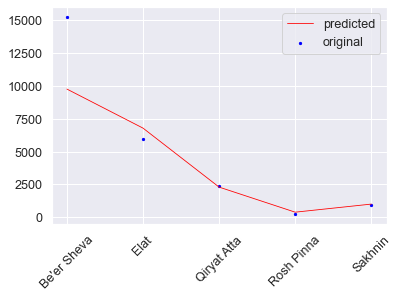

,cityName,Actual,Predicted
0,Be'er Sheva,15289,9770.0
1,Elat,5949,6794.0
2,Qiryat Atta,2416,2300.0
3,Rosh Pinna,226,389.0
4,Sakhnin,942,1005.0


In [391]:
#visualize the original and predicted test data in a plot
x_ax = range(len(y_test))
xticklabels=[name for name in data_cities['cityName']]
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, y_pred, lw=0.8, color="red", label="predicted")
plt.xticks(x_ax,xticklabels, rotation=45)
plt.legend()
plt.show()

actual_predicted_data_ada = pd.DataFrame({'Actual': y_test, 'Predicted': np.round(y_pred,decimals=0)})
actual_predicted_data_ada['cityName'] = data_cities['cityName']
actual_predicted_data_ada.set_index('cityName',inplace=True)

actual_predicted_data_ada.reset_index()

It can be see that for the adaBoost model, 3 cities out of 5 had very good prediction.
Be'er Sheva and Elat had bigger errors.
In order to evaluate the performance of the algorithm we calculated mean absolute error, mean squared error, and root mean squared error.